In [497]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# img=np.array(Image.open('Nietzsche.png'))
img=Image.open('Nietzsche.jpg')
Image.MAX_IMAGE_PIXELS = None

In [498]:
def cut_image(img, resolution):
    width=img.width
    height=img.height
    pixel=[]
    nx=int(width/resolution)
    ny=int(height/resolution)
    
    for j in range(ny):
        for i in range(nx):
            px=(i*resolution, j*resolution, (i+1)*resolution, (j+1)*resolution)
            pixel.append(px)
    image_list=[img.crop(px) for px in pixel]
    return image_list


In [499]:
def light(color):
    r=color[0]
    g=color[1]
    b=color[2]
    l=0.3*r+0.59*g+0.11*b
    l=round(l,2)
    return l

In [500]:
def create_pattern(r,num):
    fig = plt.figure(figsize=(2,2),edgecolor='blue')
    ax = fig.add_subplot() 
    num=num+10
    num=int(num/10)
    step=r/(2*(num+1))
    for i in range(num):
        l=r-2*i*step
        rect=plt.Rectangle((i*step,i*step), l, l, edgecolor = '#601113',facecolor='white',lw=3)
        ax.add_patch(rect)
        ax.set_xlim(0,r)
        ax.set_ylim(r,0)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_axis_off()
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    path='pattern/'+str(num)+'.jpg'
    fig.savefig(path)

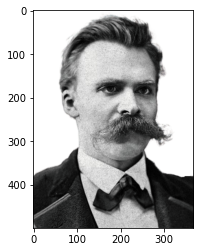

In [501]:
plt.imshow(img)


In [502]:
resolution=10
img_list=cut_image(img=img, resolution=resolution)

In [503]:
#save images
index=1
for img in img_list:
    img.save('./folder/'+str(index)+'.png')
    index=index+1

In [504]:
n=len(img_list)
colorlist=[]
for i in range(n):
    num=i+1
    filepath='folder/'+str(num)+'.png'
    img=Image.open(filepath)
    img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)  
    average=img.mean(axis=0).mean(axis=0)
    b=average[0]/255
    g=average[1]/255
    r=average[2]/255
    r=round(r,2)
    g=round(g,2)
    b=round(b,2)
    color=(r,g,b)
    colorlist.append(color)

In [505]:
img=Image.open('Nietzsche.png')
Image.MAX_IMAGE_PIXELS = None

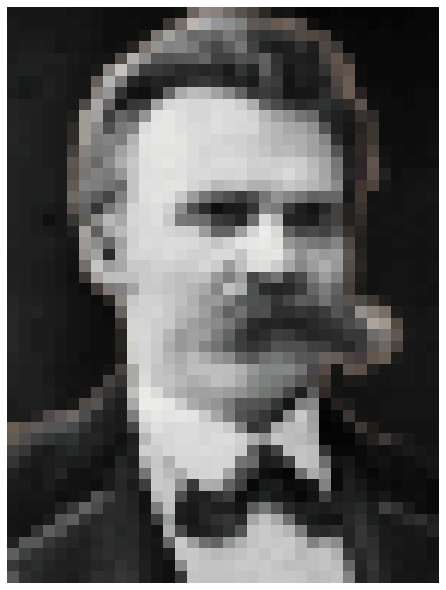

In [506]:
n=len(img_list)
r=resolution

plt.figure(figsize=(6,8))
nx=int(img.width/r)
ny=int(img.height/r)

for i in range(n):
    ax = plt.subplot(ny,nx,(i+1))
    # ax.imshow(img_list[i])
    ax.set_facecolor(colorlist[i])
    rect=plt.Rectangle((0,0),r,r,color=colorlist[i])
    ax.add_patch(rect)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()

plt.tight_layout(pad=0.0001)
plt.savefig("NewNietzsche.png",dpi=300)
plt.show()

In [507]:
colorlist_filtered=list(set(colorlist))
color_num=len(colorlist_filtered)
L=[]
for i in range(color_num):
    l=light(colorlist_filtered[i])
    L.append(l)
L=list(set(L))
L=sorted(L,reverse=True,key=float)


l=len(L)

Create Pattern

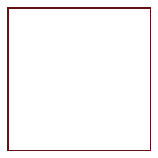

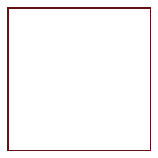

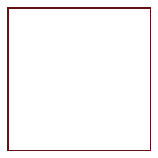

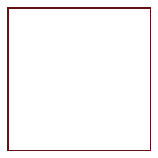

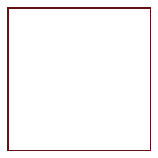

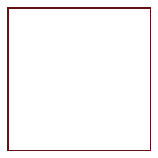

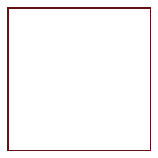

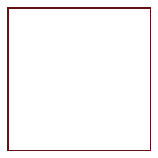

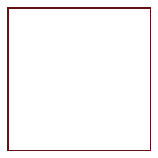

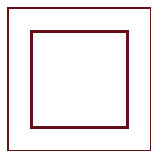

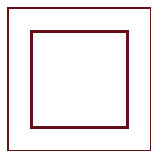

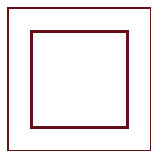

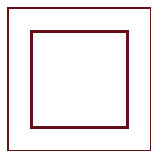

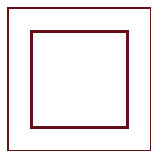

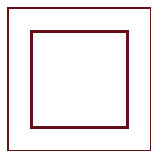

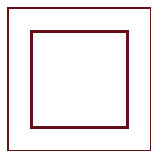

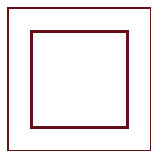

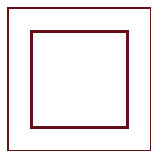

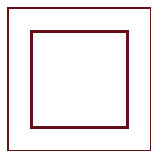

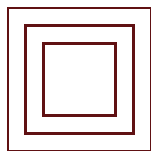

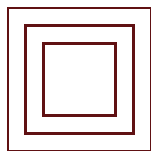

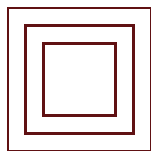

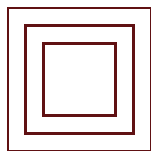

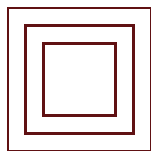

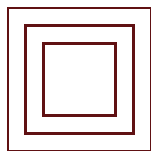

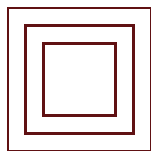

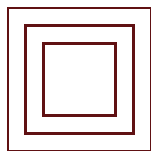

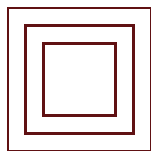

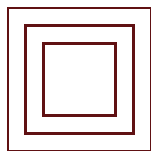

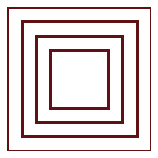

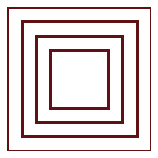

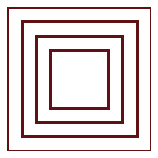

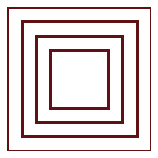

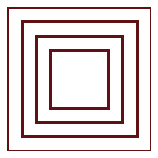

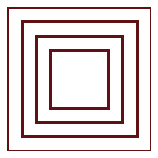

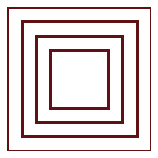

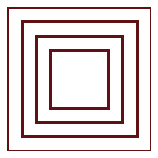

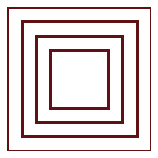

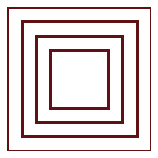

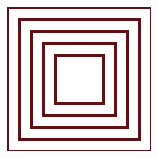

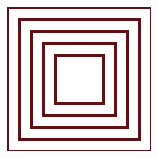

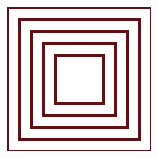

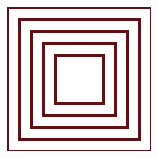

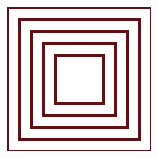

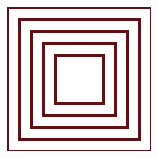

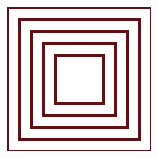

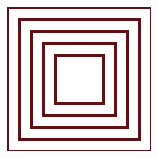

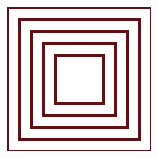

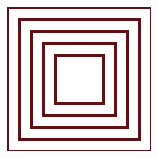

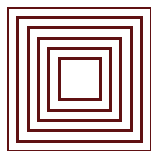

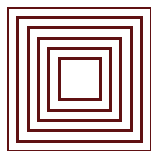

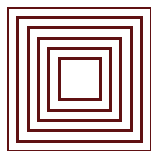

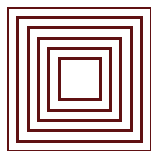

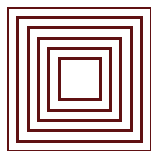

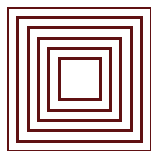

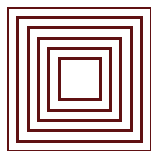

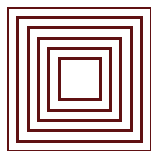

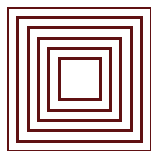

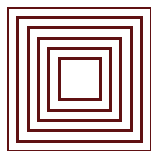

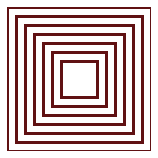

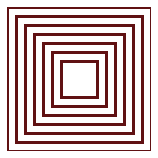

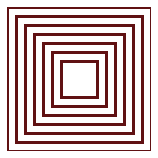

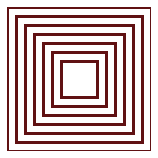

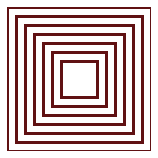

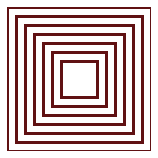

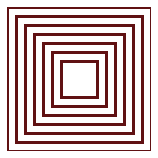

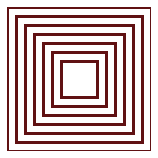

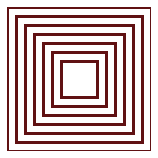

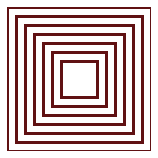

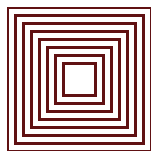

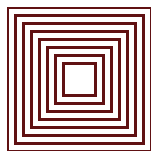

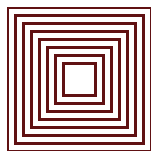

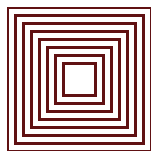

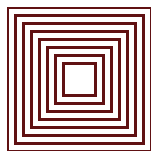

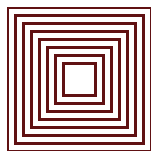

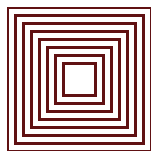

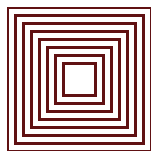

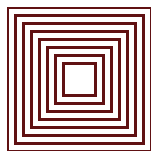

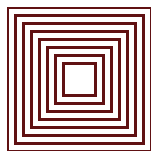

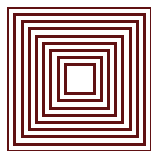

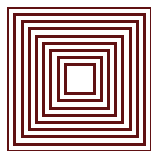

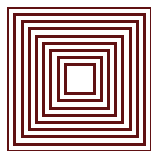

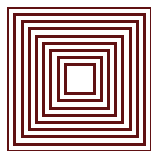

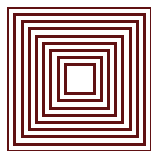

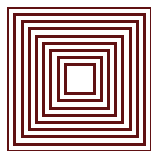

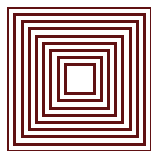

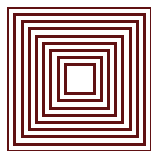

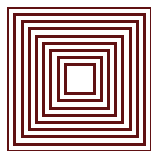

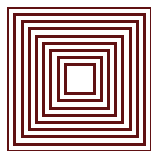

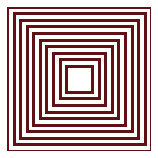

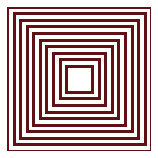

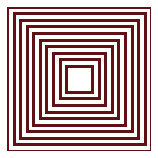

In [508]:
for i in range(l):
    create_pattern(r,i+1)

In [509]:
n=len(img_list)
r=resolution

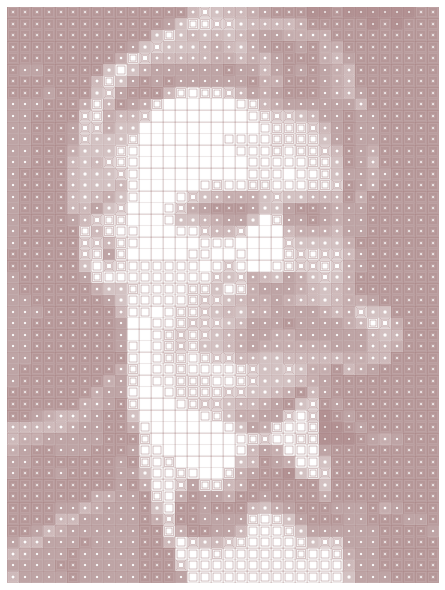

In [510]:

plt.figure(figsize=(6,8))
for i in range(n):
    ax = plt.subplot(ny,nx,(i+1))

    color=colorlist[i]
    l=light(color)
    p=L.index(l)
    p=int(p/10+1)

    path='pattern/'+str(p)+'.jpg'
    img=plt.imread(path)
    ax.imshow(img)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()

plt.tight_layout(pad=0.0001)
plt.savefig("NewNietzsche2.jpg",dpi=300)
plt.show()